In [20]:
import importlib
import models
importlib.reload(models)

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median

In [21]:
df = pd.read_excel("model_one_results.xlsx", sheet_name="5.4", skiprows=2)

In [22]:
def max_degree(G):
    # Initialize max_degree
    max_degree = -1

    # Iterate over all nodes and their degrees
    for degree in G.degree():
        if degree[1] > max_degree:
            max_degree = degree[1]
    
    return max_degree

In [ ]:
model_avgs = pd.DataFrame()

# Update Dataframe for Models Two and Three

First, we just need the number of vertices and random seed. Then, we will add larger number of vertices so that we can run more trials and explore the graphs created by these models when there are more vertices.

In [29]:
df = df[["num_vertices", "rand_seed"]].drop_duplicates()

new_vert = [200, 400] #, 600, 800] # , 10000, 12000, 14000, 16000, 18000, 20000, 25000]
for vert in new_vert:
    for seed in df["rand_seed"].unique()[0:3]:
        new_row = pd.DataFrame([{'num_vertices': vert, 'rand_seed': seed}])
        new_df = pd.concat([df, new_row], ignore_index=True)

# Model Two

In [30]:
# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_two(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_two_df = df.assign(planar=planar, connected=connected, 
                             avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [31]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_two_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 2')], axis=1)

## Visualize Graphs

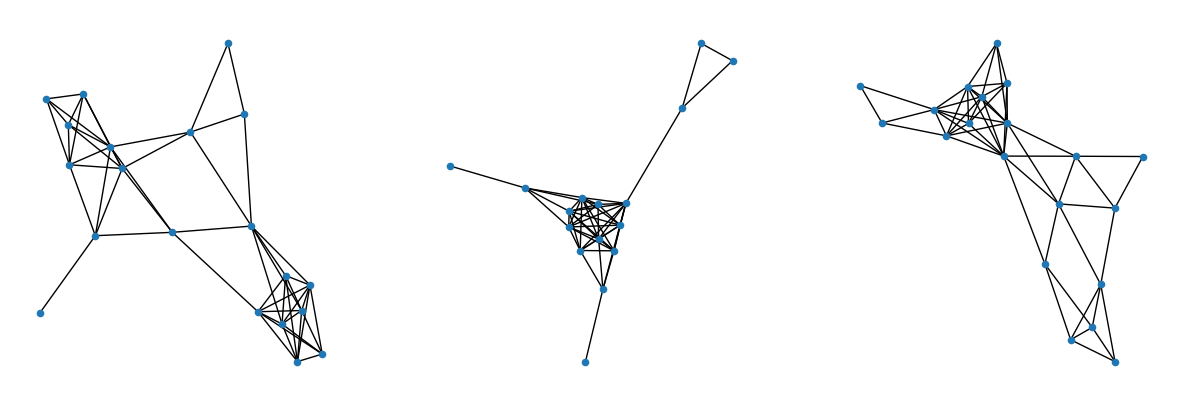

In [32]:
# Create graphs with 20 vertices
G1 = models.model_two(20, 13)
G2 = models.model_two(20, 47)
G3 = models.model_two(20, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

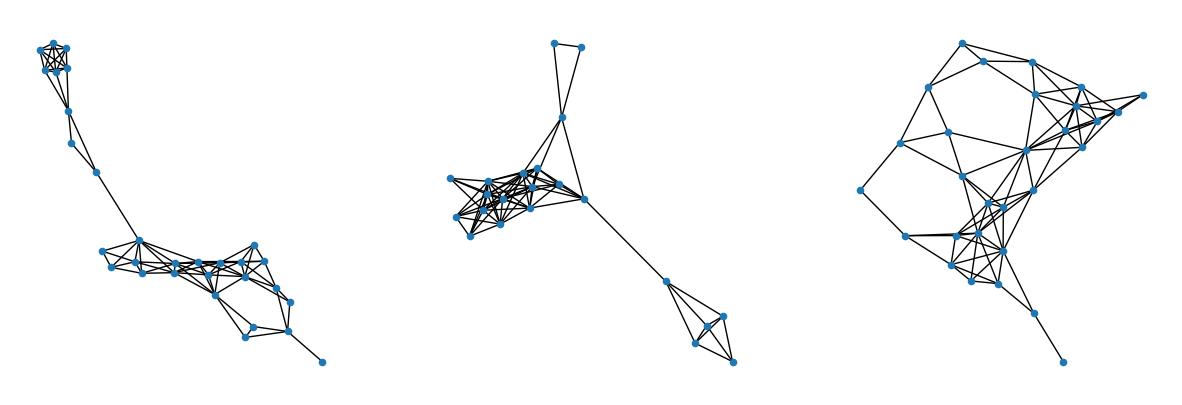

In [33]:
# Create graphs with 30 vertices
G1 = models.model_two(30, 13)
G2 = models.model_two(30, 47)
G3 = models.model_two(30, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

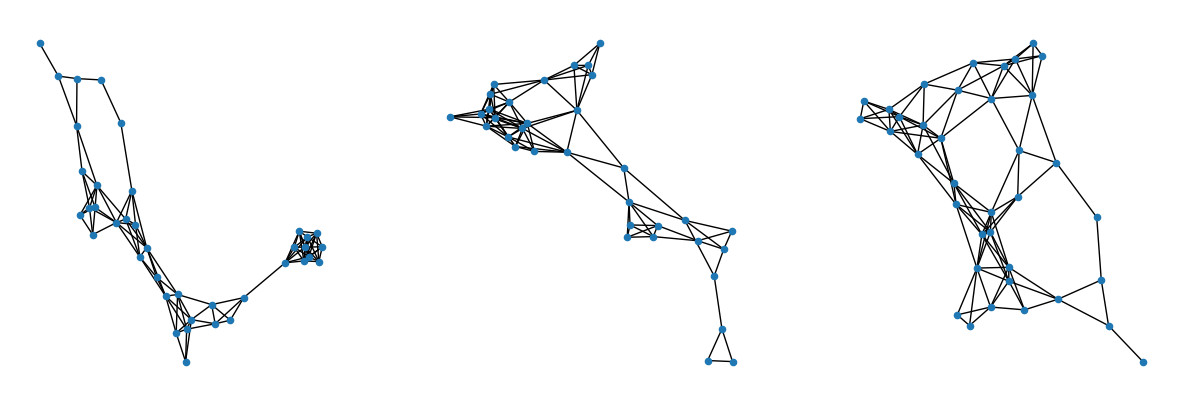

In [34]:
# Create graphs with 40 vertices
G1 = models.model_two(40, 13)
G2 = models.model_two(40, 47)
G3 = models.model_two(40, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

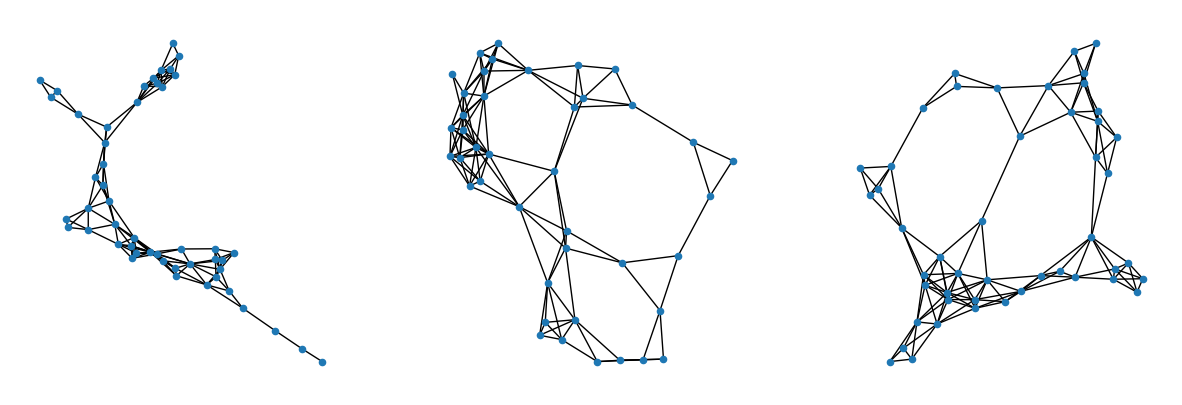

In [35]:
# Create graphs with 50 vertices
G1 = models.model_two(50, 13)
G2 = models.model_two(50, 47)
G3 = models.model_two(50, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

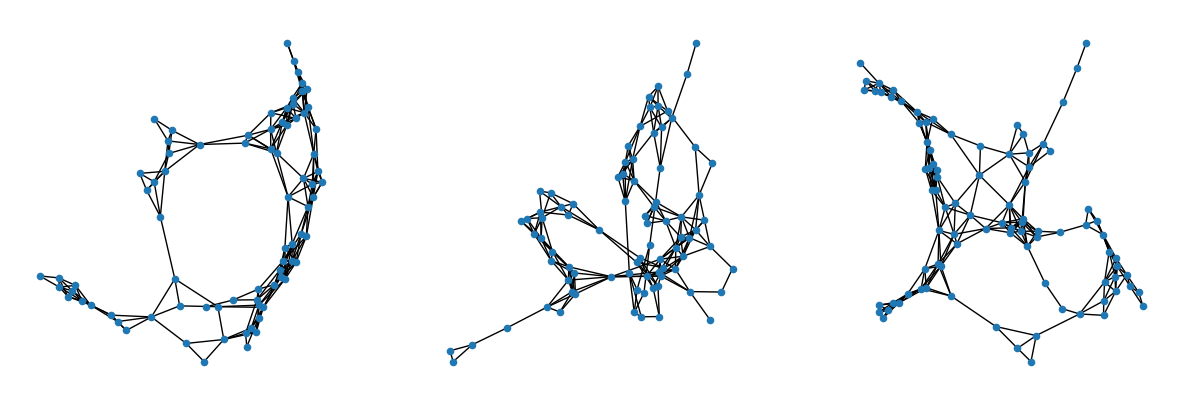

In [36]:
# Create graphs with 100 vertices
G1 = models.model_two(100, 13)
G2 = models.model_two(100, 47)
G3 = models.model_two(100, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: None are planar and one is not connected. Random seed 23 with 40 vertices. Althought it seems like there are too many edges, but I'm not sure.

# Model Three

In [37]:
# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_three(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_three_df = df.assign(planar=planar, connected=connected, 
                               avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [38]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_three_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 3')], axis=1)

## Visualize Graphs

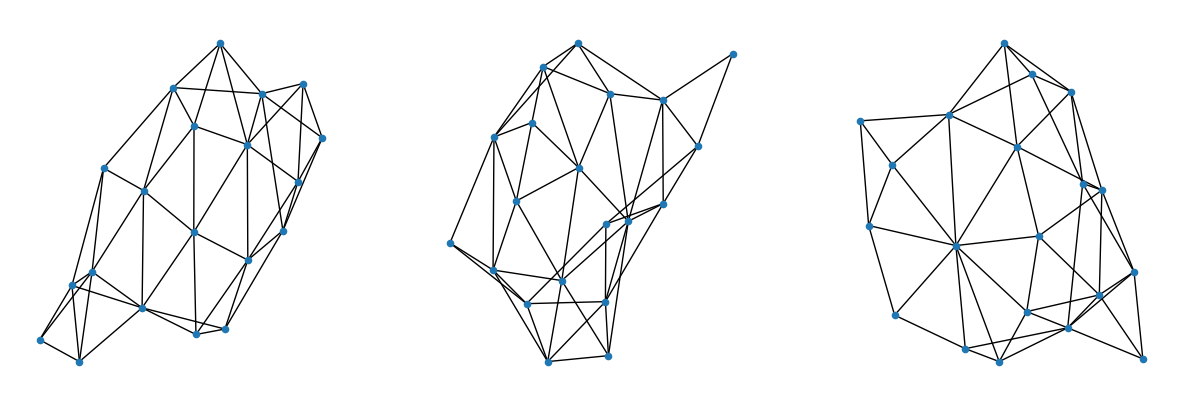

In [39]:
# Create graphs with 20 vertices
G1 = models.model_three(20, 13)
G2 = models.model_three(20, 47)
G3 = models.model_three(20, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

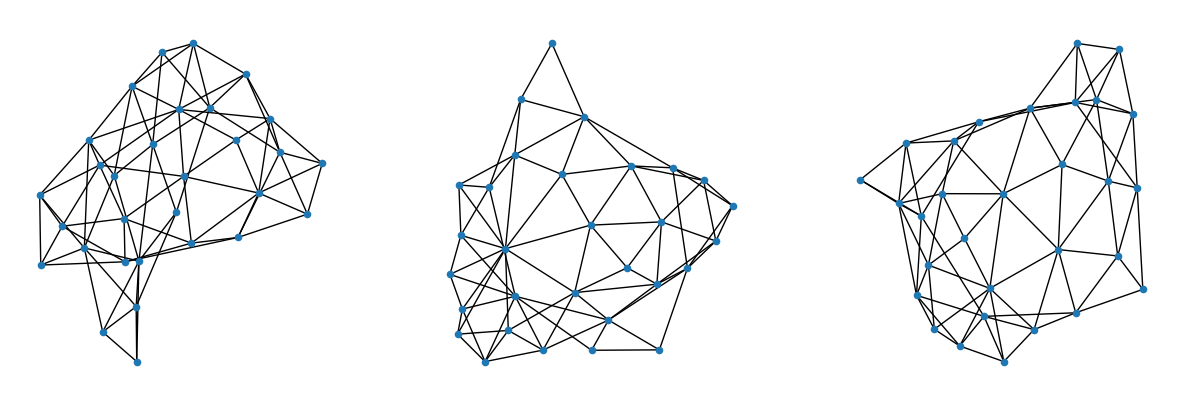

In [40]:
# Create graphs with 30 vertices
G1 = models.model_three(30, 13)
G2 = models.model_three(30, 47)
G3 = models.model_three(30, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

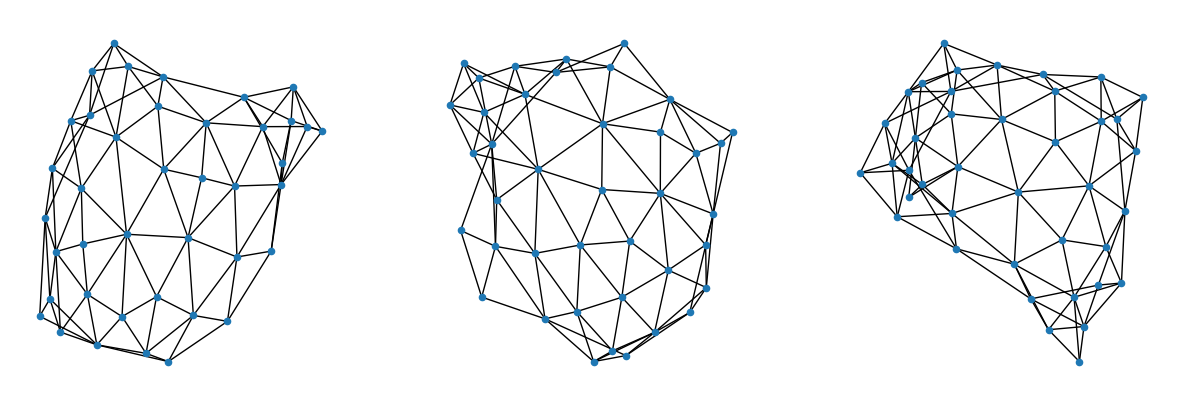

In [41]:
# Create graphs with 40 vertices
G1 = models.model_three(40, 13)
G2 = models.model_three(40, 47)
G3 = models.model_three(40, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

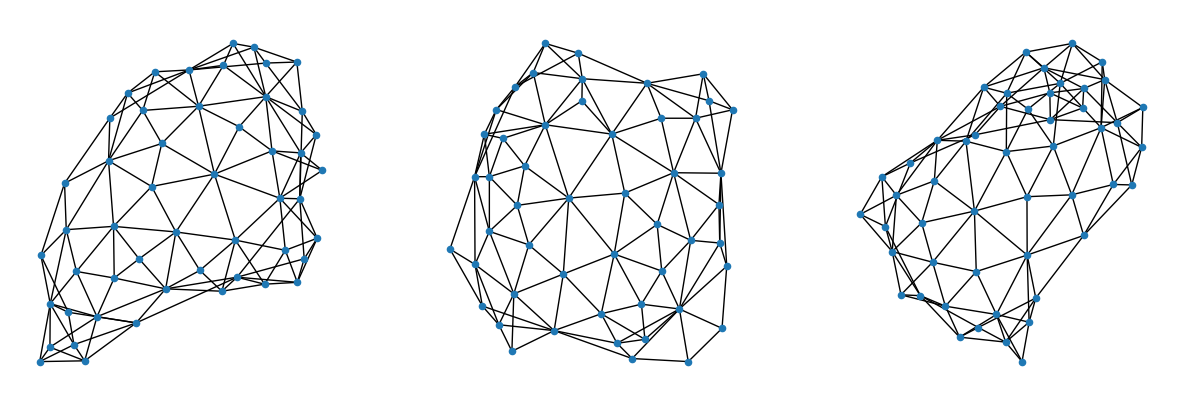

In [42]:
# Create graphs with 50 vertices
G1 = models.model_three(50, 13)
G2 = models.model_three(50, 47)
G3 = models.model_three(50, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

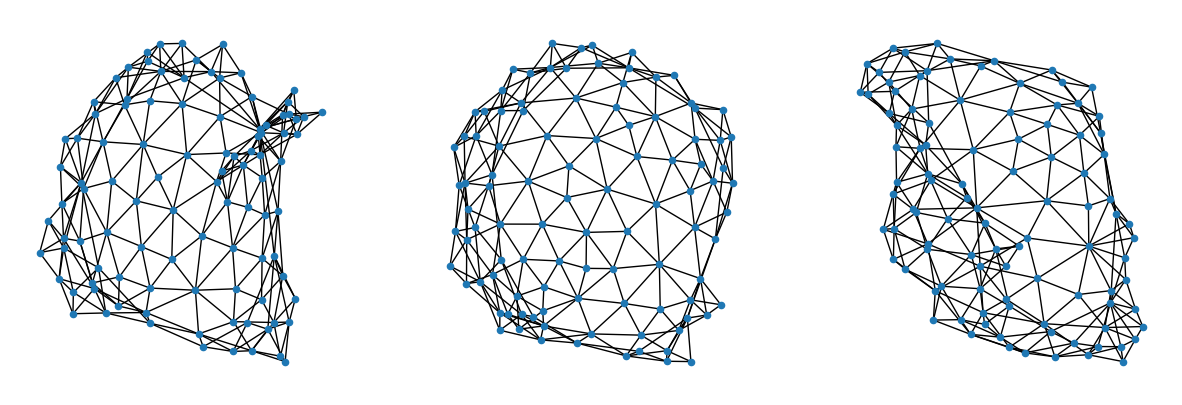

In [43]:
# Create graphs with 100 vertices
G1 = models.model_three(100, 13)
G2 = models.model_three(100, 47)
G3 = models.model_three(100, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: All are planar and connected.

# Model 4

Delaunay Triangulation (Model 3) with random edges removed with on a 0.2 probability

In [44]:
# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_three_with_removal(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_four_df = df.assign(planar=planar, connected=connected, 
                               avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [45]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_four_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 4')], axis=1)

# Model 4b

Delaunay Triangulation (Model 3) with random edges removed with on a 0.4 probability

In [46]:
# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_three_with_removal(n, rs, 0.4)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_fourb_df = df.assign(planar=planar, connected=connected, 
                               avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [47]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_fourb_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 4b')], axis=1)

# Model 5

Creates a graph with (5.4/2)n shortest edges and adds some probabilistic edges. Basically a combination of model 2 and model 1.

In [48]:
# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_five(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_five_df = df.assign(planar=planar, connected=connected, 
                               avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [49]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_five_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 5')], axis=1)

Way too interconnected and too high degree. But, it would be interesting trying it but with less edges.

# Compare Model Averages

In [50]:
model_avgs

,Model 1,Model 2,Model 3,Model 4,Model 4b,Model 5
planar,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
connected,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
avg_deg,5.399487,5.620905,5.405163,3.512781,2.347768,31.124837
median_deg,5.192308,5.463415,5.365854,3.487805,2.182927,31.182927
max_deg,11.102564,10.463415,8.902439,6.853659,5.048780,44.853659
